In [89]:
!pip install librosa


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [90]:
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt

In [91]:
ipd.Audio('file_example_WAV_2MG.wav')

reading our file with librosa library

In [92]:
music , sr = librosa.load('file_example_WAV_2MG.wav')

In [93]:
print("Shape of the audio file: ",music.shape)
print("Sample Rate of the audio file: ",sr)

Shape of the audio file:  (739329,)
Sample Rate of the audio file:  22050


duration for one sample in secods

In [94]:
sample_duration = 1 / sr
print(f"Duration of one sample is {sample_duration:6f} seconds")

Duration of one sample is 0.000045 seconds


In [95]:

tot_samples = len(music)
tot_samples

739329

In [96]:
duration = 1 / sr * tot_samples
print(f"Duration of whole audio is {duration} seconds")

Duration of whole audio is 33.52965986394558 seconds


visualizing audio signal in time domain

Text(0.5, 1.0, 'Sample music')

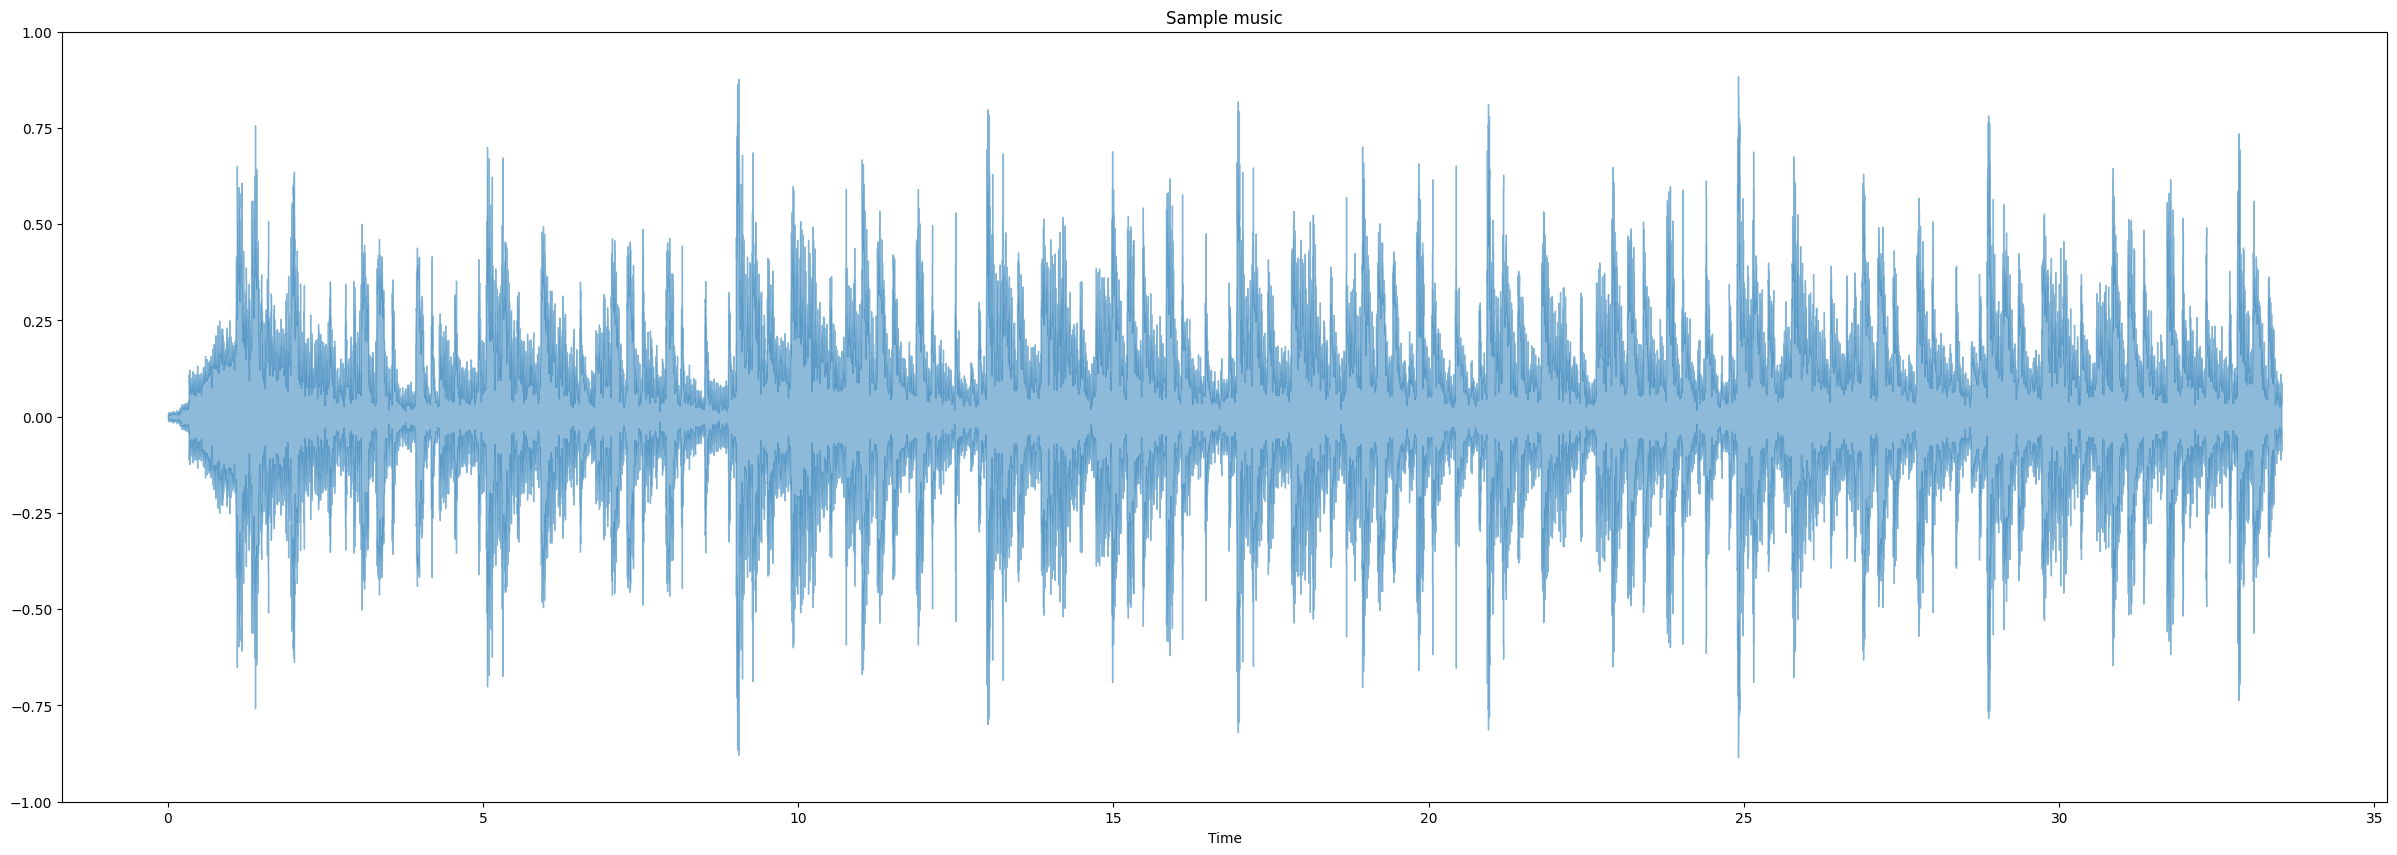

In [97]:
plt.figure(figsize=(30, 10))

librosa.display.waveshow(music, alpha=0.5)

plt.ylim((-1, 1))
plt.title("Sample music")

extracting time domain audio features

In [98]:
FRAME_SIZE = 1024
HOP_LENGTH = 512  ### used for overlapping frames

def amplitude_envelope(signal, frame_size, hop_length):
    amplitude_envelope = []
    
    # calculate amplitude envelope for each frame
    for i in range(0, len(signal), hop_length): 
        amplitude_envelope_current_frame = max(signal[i:i+frame_size]) 
        amplitude_envelope.append(amplitude_envelope_current_frame)
    
    return np.array(amplitude_envelope)

In [99]:
AE_music = amplitude_envelope(music, FRAME_SIZE, HOP_LENGTH)

In [100]:
print("The total number of frames produced : ",len(AE_music))

The total number of frames produced :  1445


visualizing AE

Text(0.5, 1.0, 'Sample music')

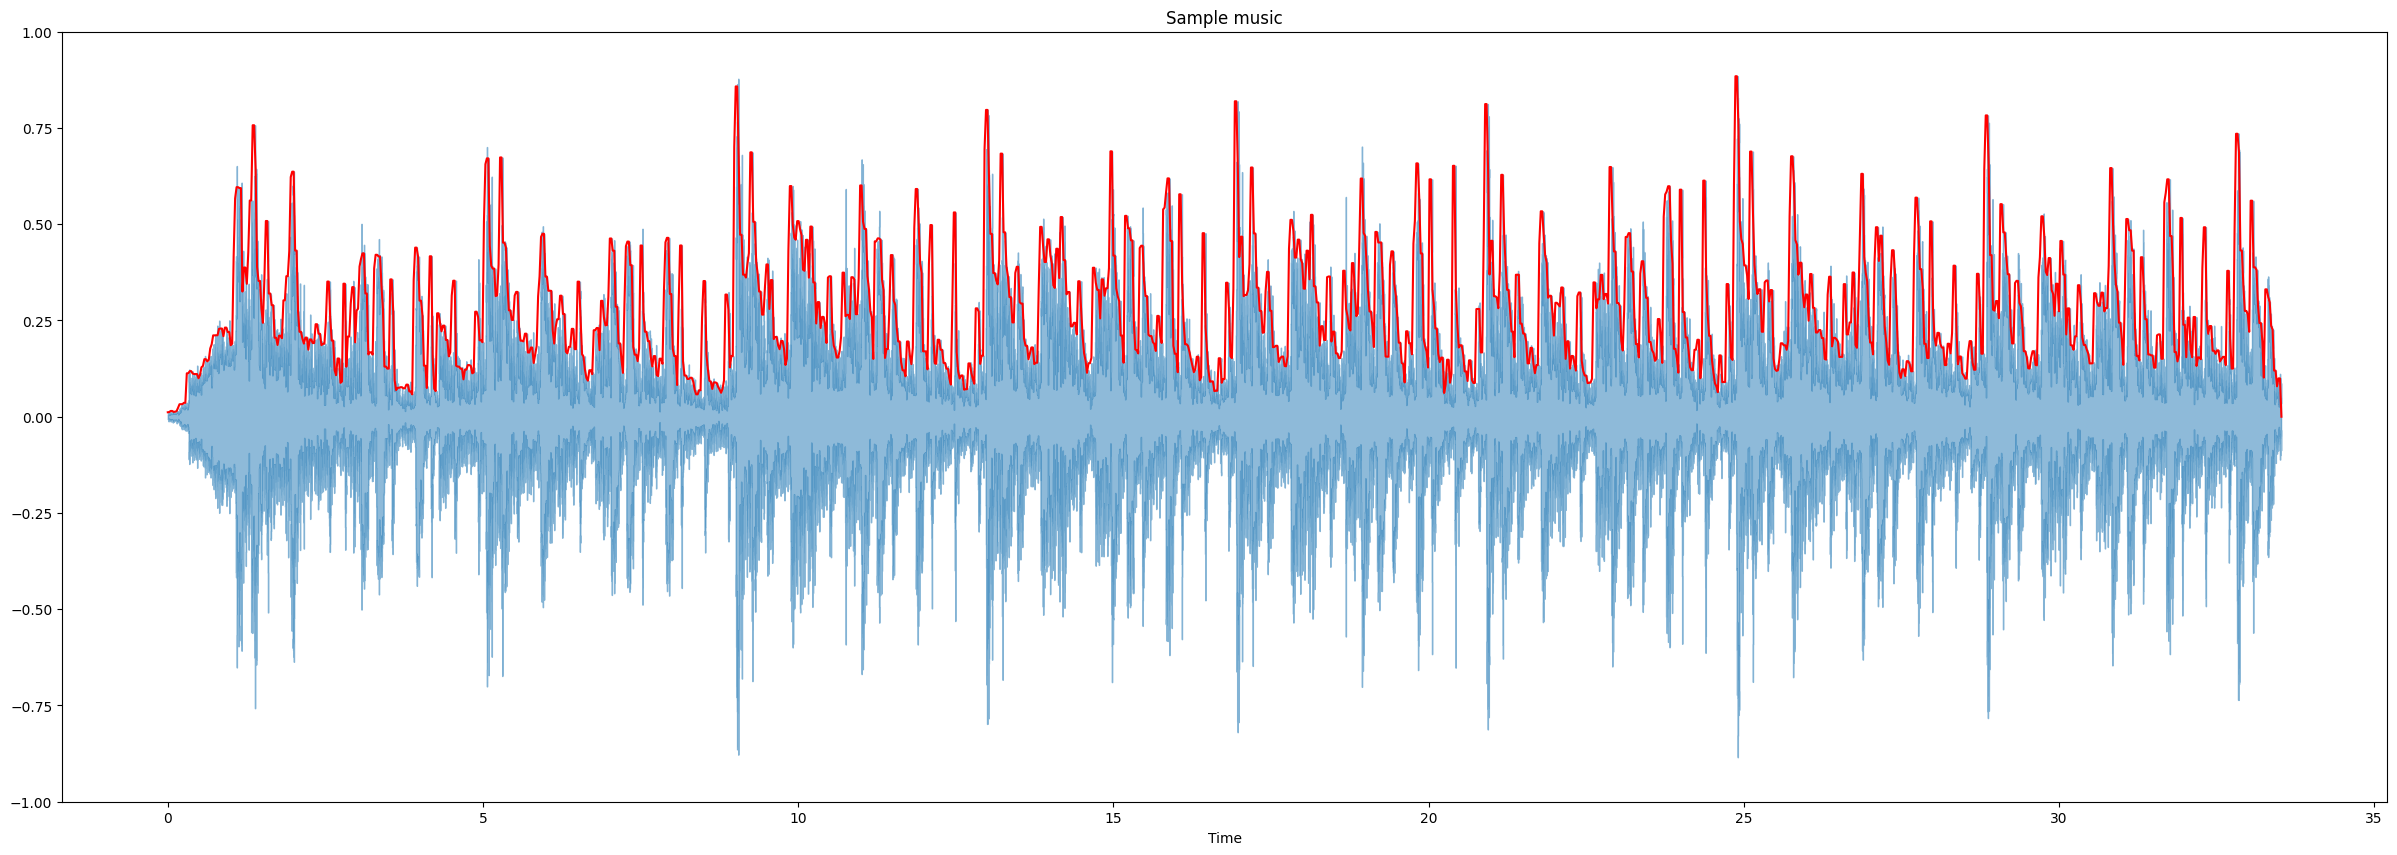

In [101]:
frames = range(len(AE_music))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

plt.figure(figsize=(30, 10))

librosa.display.waveshow(music, alpha=0.5)
plt.plot(t, AE_music, color="r")
plt.ylim((-1, 1))
plt.title("Sample music")

application for ampitude envolpe

In [102]:
ZCR_music = librosa.feature.zero_crossing_rate(music, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

In [103]:
frames = range(len(ZCR_music))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

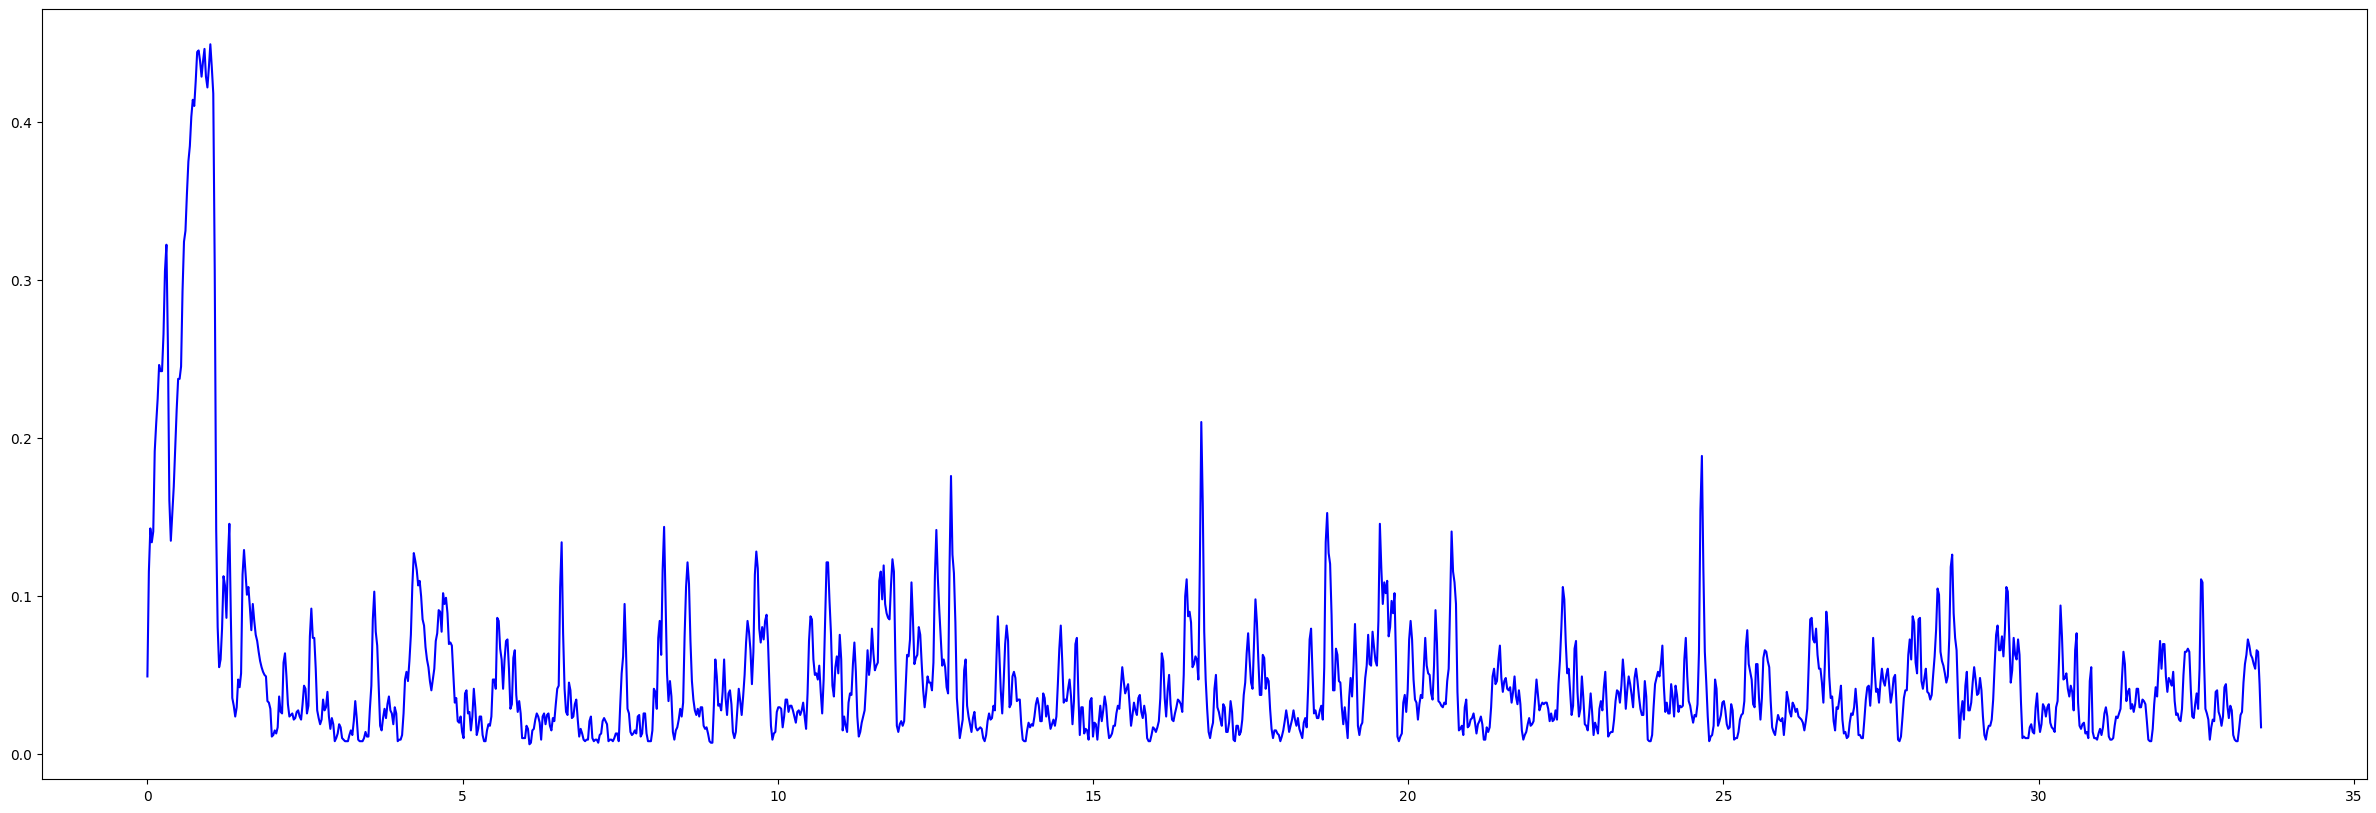

In [104]:
plt.figure(figsize=(30, 10))

plt.plot(t, ZCR_music, color="b")

application for zero crossing rate

In [105]:
RMS_music = librosa.feature.rms(y=music, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]


Text(0.5, 1.0, 'Sample music')

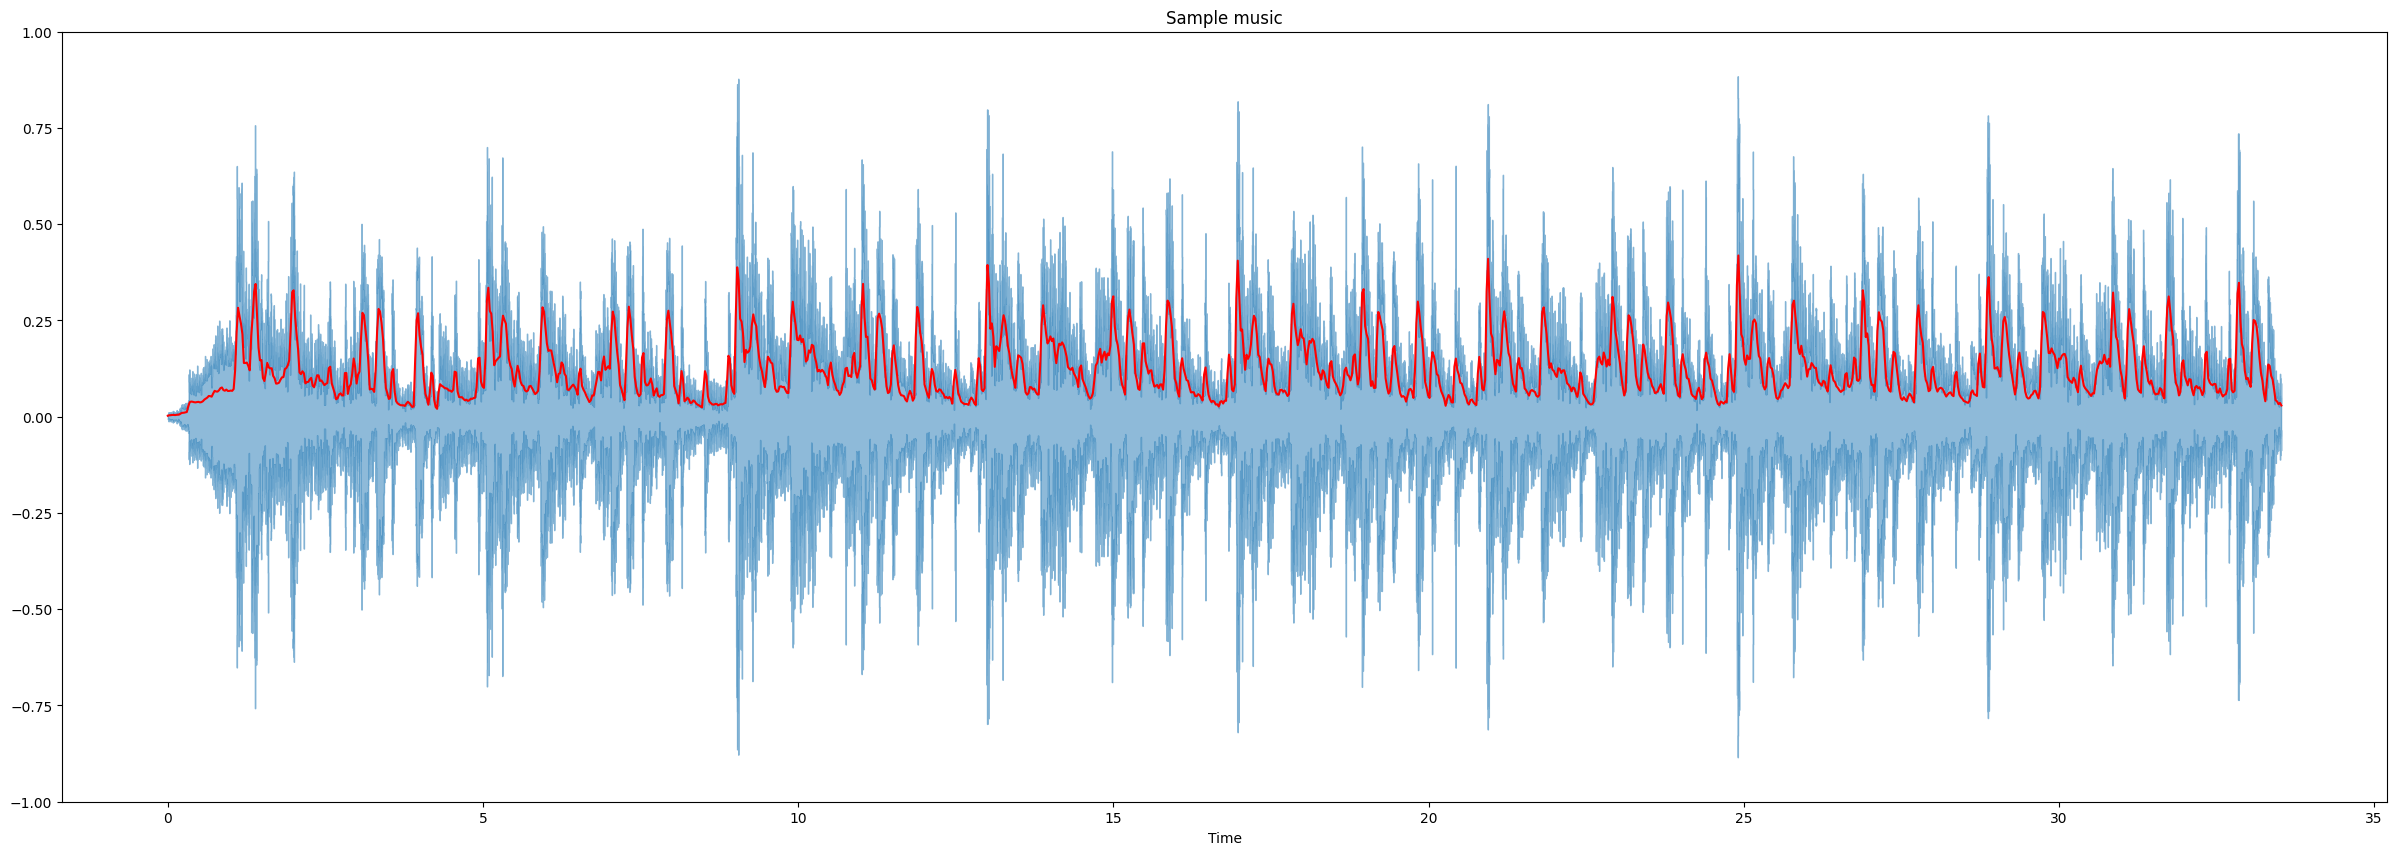

In [106]:
frames = range(len(RMS_music))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

plt.figure(figsize=(30, 10))

librosa.display.waveshow(music, alpha=0.5)
plt.plot(t, RMS_music, color="r")
plt.ylim((-1, 1))
plt.title("Sample music")

application for fouriour transform

In [107]:
fft_music = np.fft.fft(music)
len(fft_music)

739329

In [108]:
def plot_magnitude_spectrum(signal, sr, title, f_ratio=1):
    fft_music = np.fft.fft(signal)
    fft_abs = np.absolute(fft_music)
    
    plt.figure(figsize=(18, 5))
    
    f = np.linspace(0, sr, len(fft_abs))
    f_bins = int(len(fft_abs)*f_ratio)  
    
    plt.plot(f[:f_bins], fft_abs[:f_bins])
    plt.xlabel('Frequency (Hz)')
    plt.title(title)

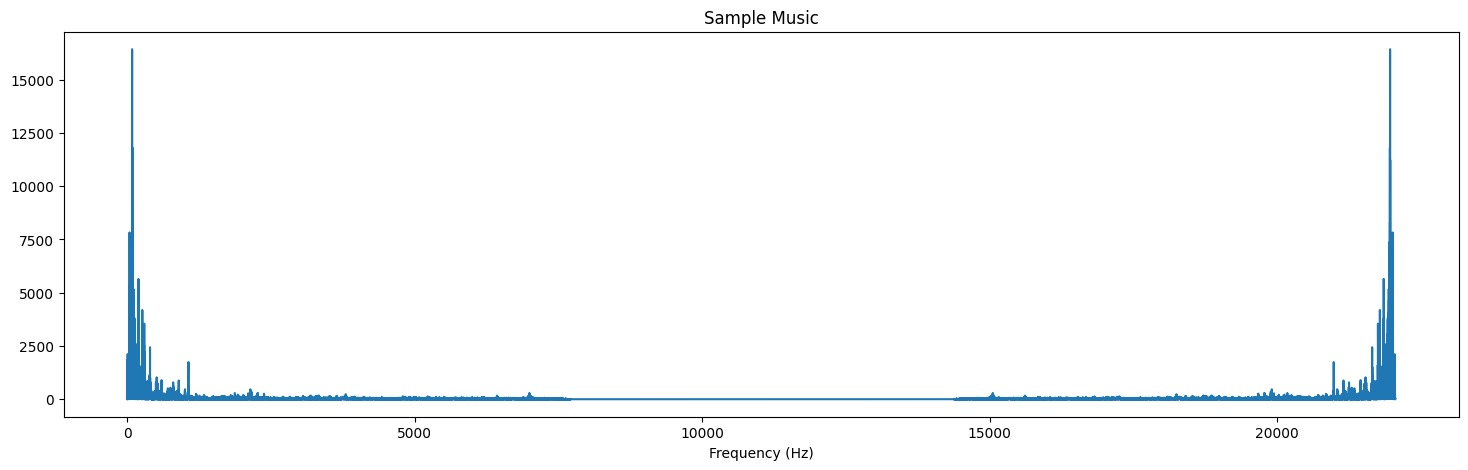

In [109]:
plot_magnitude_spectrum(music, sr, "Sample Music", 1)

plotting a spectrogram

In [110]:
### extracting short time fourier transform

FRAME_SIZE = 2048
HOP_SIZE = 512

ssft = librosa.stft(music, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

In [111]:
type(ssft[0][0])

numpy.complex64

In [112]:
ssft_abs = np.abs(ssft) ** 2
type(ssft_abs[0][0])

numpy.float32

In [113]:
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y, 
                             sr=sr, 
                             hop_length=hop_length, 
                             x_axis="time", 
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f")

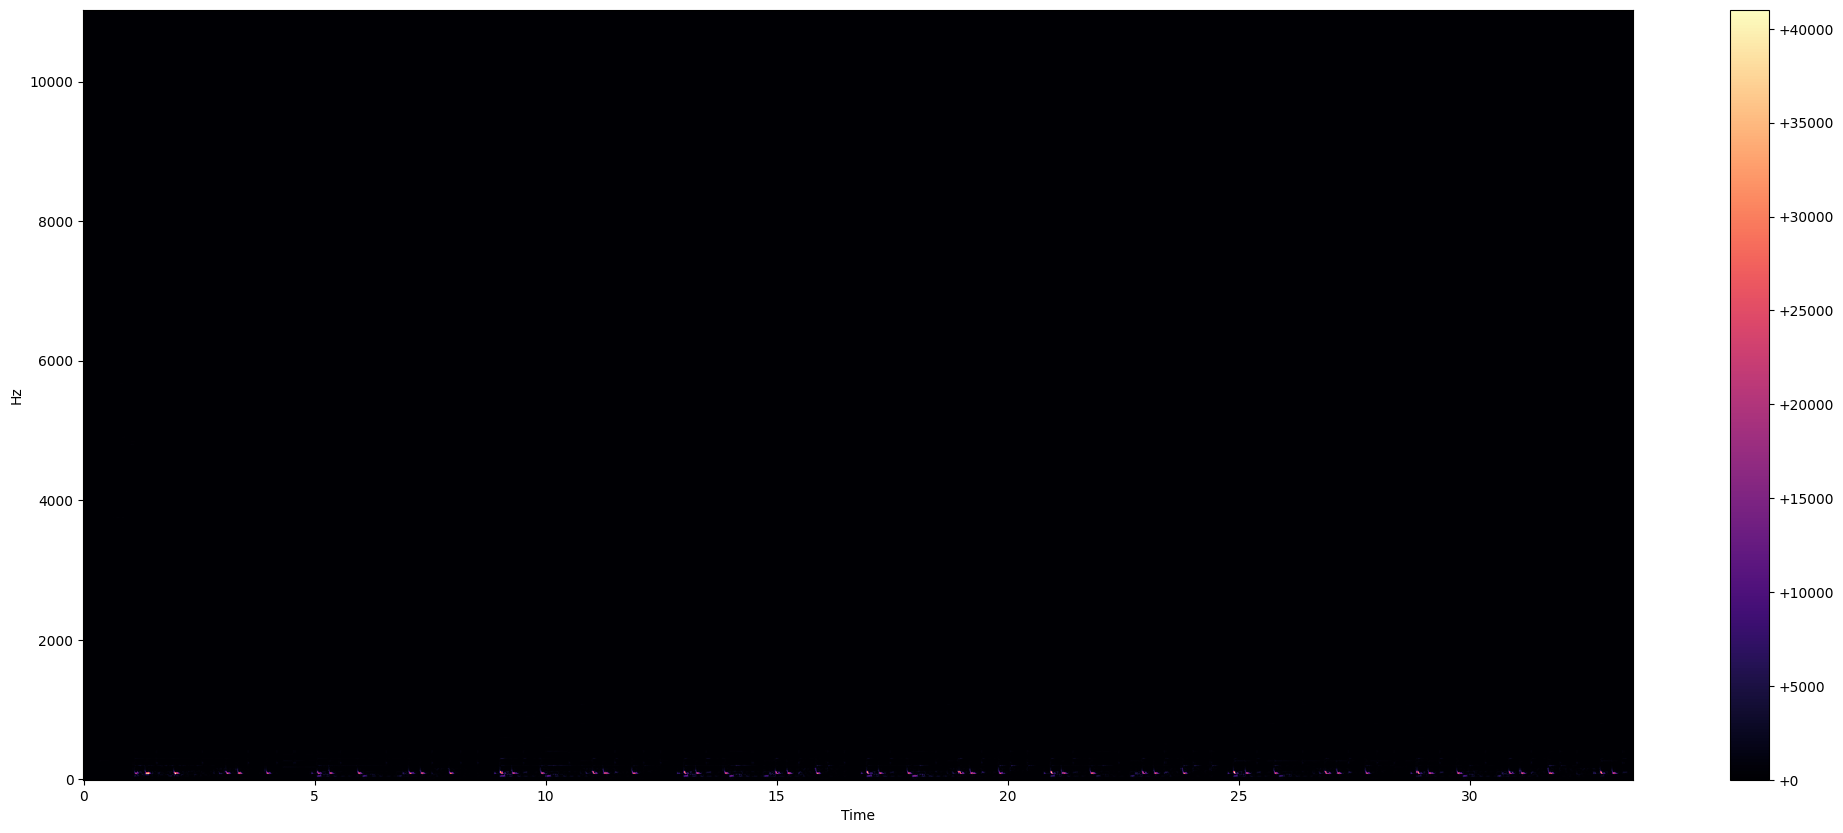

In [114]:
plot_spectrogram(ssft_abs, sr, HOP_SIZE)

calculating mel frequency

In [115]:
mfccs = librosa.feature.mfcc(y=music, n_mfcc=13, sr=sr)

In [116]:
delta_mfccs = librosa.feature.delta(mfccs)

In [117]:
delta2_mfccs = librosa.feature.delta(mfccs, order=2)

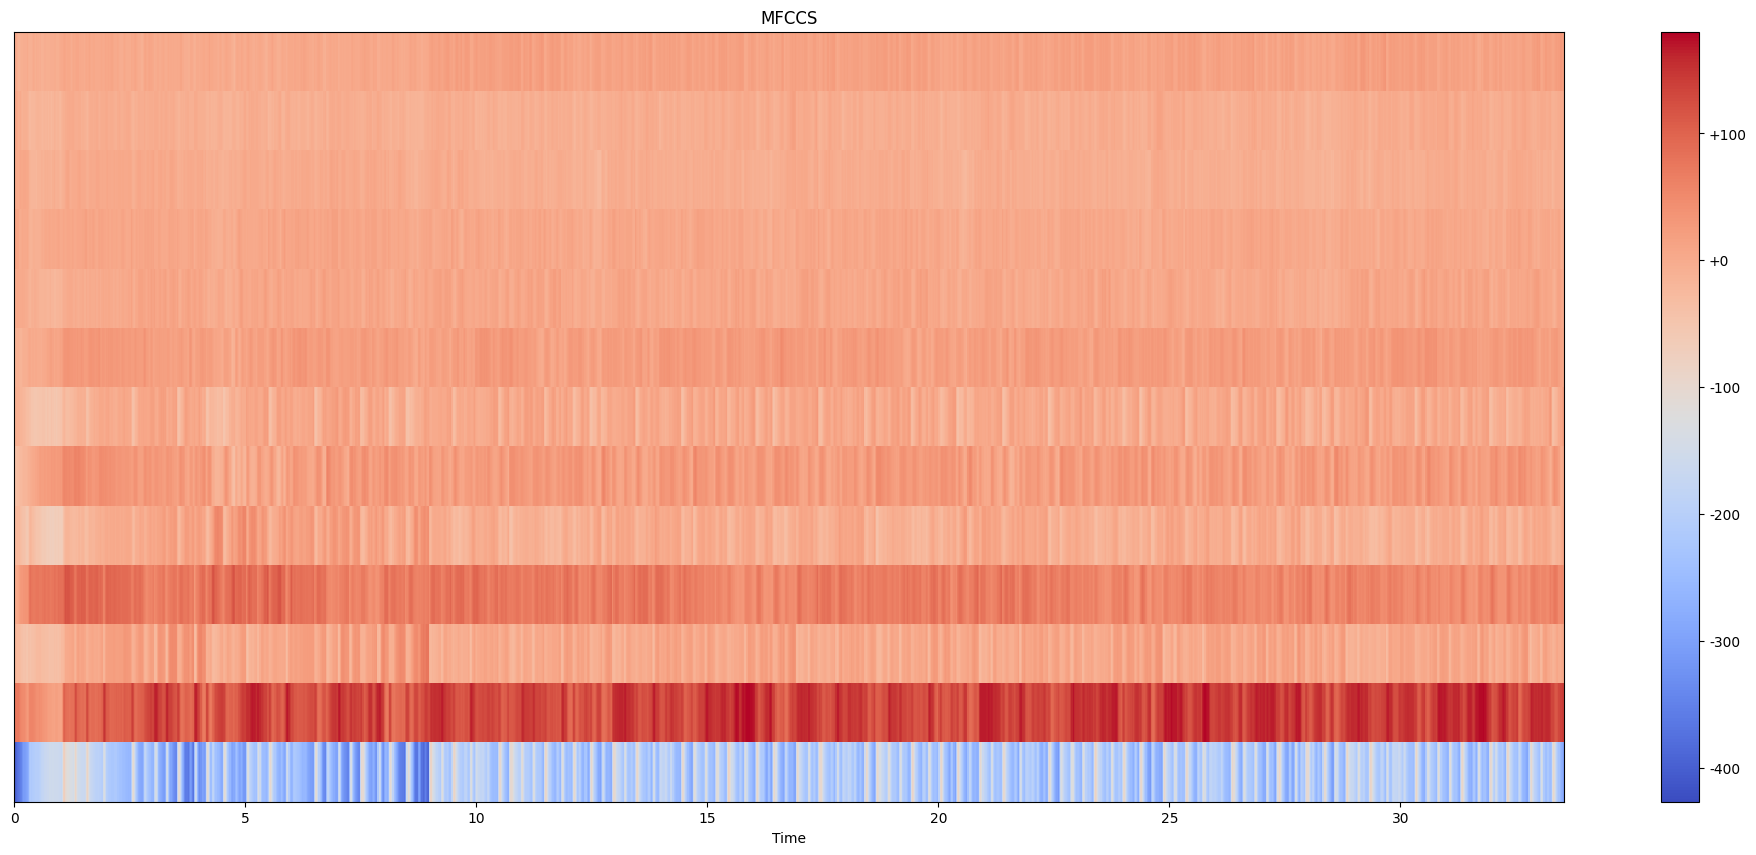

In [118]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(mfccs, 
                         x_axis="time", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.title('MFCCS')
plt.show()

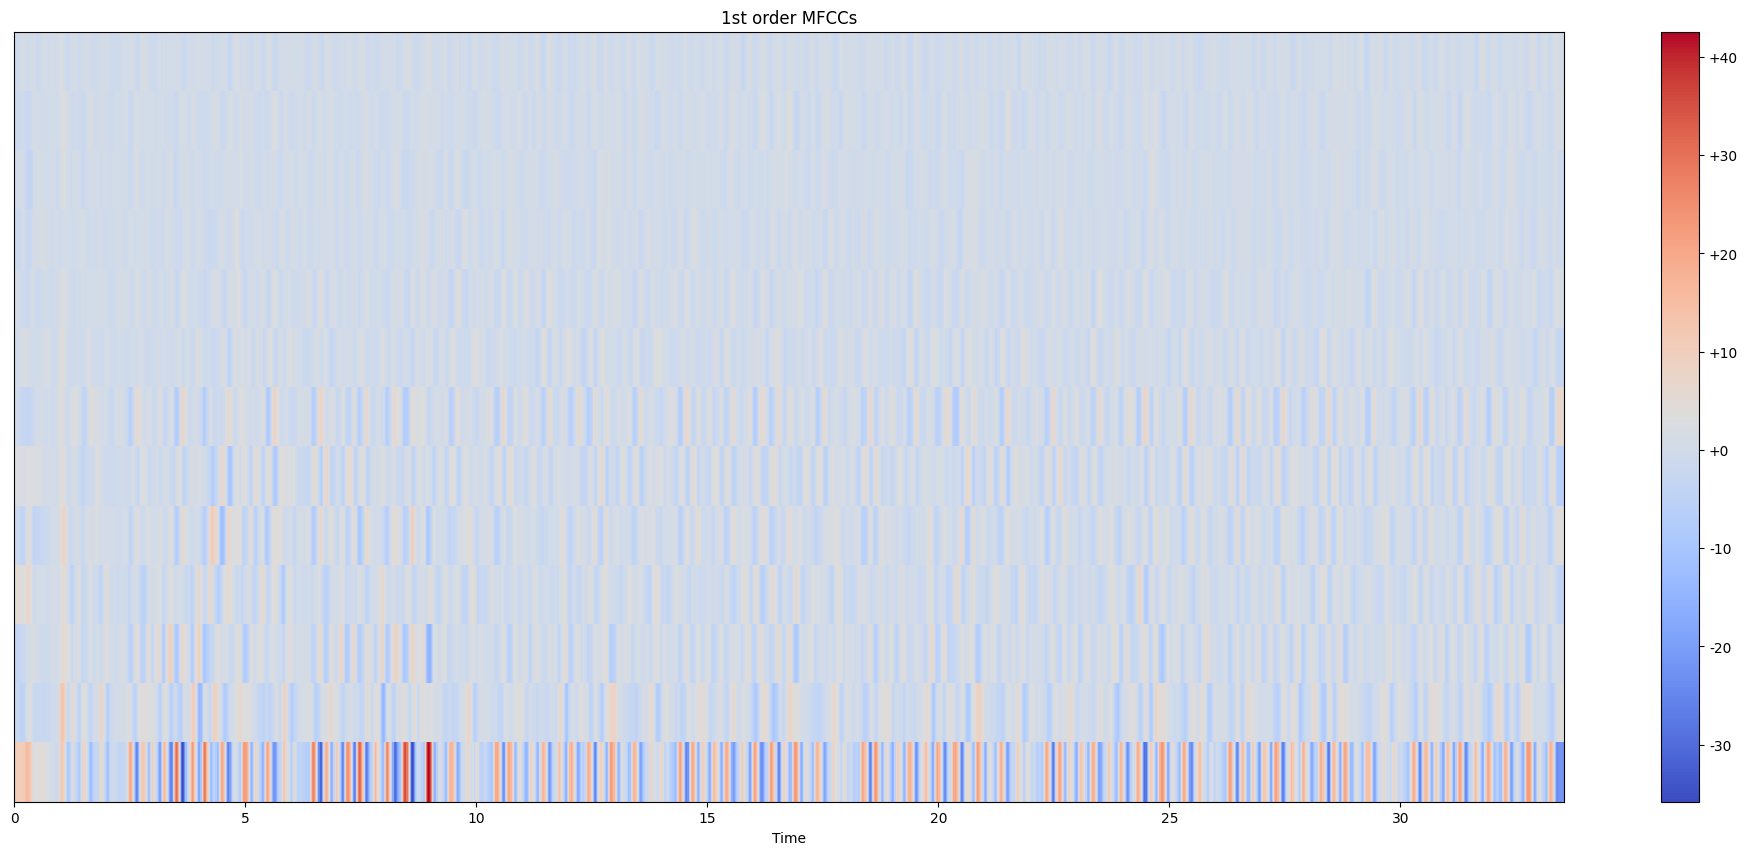

In [119]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(delta_mfccs, 
                         x_axis="time", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.title('1st order MFCCs')
plt.show()

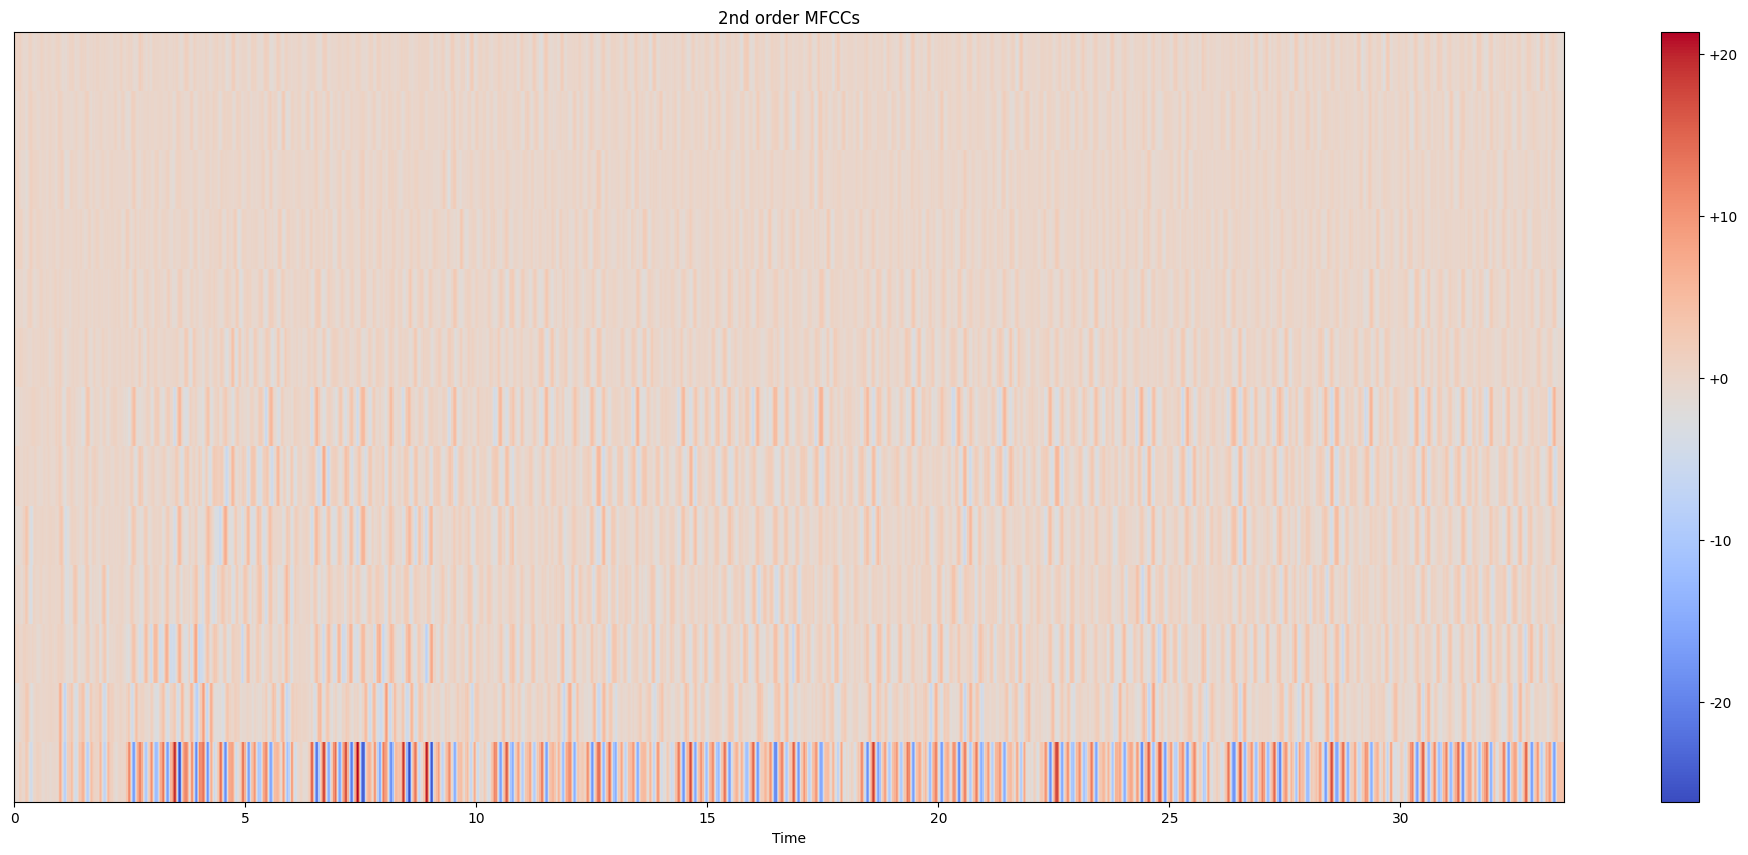

In [120]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(delta2_mfccs, 
                         x_axis="time", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.title('2nd order MFCCs')
plt.show()